A Project to identify arbitrage opportunities between two stock exchanges trading the same stock. The algorithm searches for the possibility of a mismatch and trades on it. Next to that, it takes into account certain limits, which is set to a max position of 250 to prevent massive losses if the algorithm malfunctions.

In [1]:
# Import pandas and numpy for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set Jupyter to render directly to the screen
%matplotlib inline

This code is used to import libraries and modules that allow us to work with data in the Python programming language.   The first three lines 'import' the pandas, numpy, and matplotlib modules, which are like big toolboxes that have lots of tools for working with data. The last line specifies that we want to use the 'inline' mode of the matplotlib module, which means that any plots we create will appear directly in the same page, rather than in a separate window.  These libraries and modules are like special helpers that we can use to do different tasks with data. They make it easier for us to analyze and visualize data in a clear and organized way. With these tools, we can take a lot of numbers and information and make them into graphs and charts that we can understand and interpret.   Overall, this code helps us to get ready to work with data and make it into something that we can look at and make sense of.

In [2]:
def read_data(filename):
    '''
    This reads the .csv stored at the 'filename' location and returns a DataFrame
    with two-level columns. The first level column contains the Exchange and the 
    second contains the type of market data, e.g. bid/ask, price/volume.
    '''
    df = pd.read_csv(filename, index_col=0)
    df.columns = [df.columns.str[-7:], df.columns.str[:-8]]

    return df

This python code is designed to read data from a file that is in the .csv (comma separated values) format. It does this by taking in a specific filename, which tells the code where to look for the data.   Once it has the data, the code organizes it into a table-like structure called a DataFrame. Each row in this table represents a different data point and each column represents a different category of data.  This code also makes sure that the columns are organized in a specific way. The first level of columns represents the different stock exchanges where the data was collected from. The second level of columns indicates the type of market data, such as the current bid and ask prices for a stock or the volume of shares being traded.  After organizing the data, the code returns the DataFrame, which can then be used for further analysis or visualizations.

In [4]:
# Read the data for one of the stocks
filename = 'HWG.csv'
market_data = read_data(filename)

This code is used to read data from a file named 'HWG.csv' and store it in a variable called 'market_data'. It uses a function called 'read_data' to do this. Think of a file as being like a notebook where information is written down. The code is like asking a person to open a notebook named 'HWG.csv' and read the information written inside. Then the information is saved in a special place (a variable) called 'market_data' where we can use it later in the code.

In [5]:
# Visualization of the columns in the DataFrame
market_data.head()

I-XCHNG                               Z-XCHNG            \
                    BidPrice BidVolume AskPrice AskVolume BidPrice BidVolume   
2018-01-01 00:05:00   114.25     120.0   114.55     120.0   113.95      40.0   
2018-01-01 00:10:00   114.05     119.0   114.40     102.0   113.65      42.0   
2018-01-01 00:15:00   114.05     119.0   114.40     105.0   113.30      41.0   
2018-01-01 00:20:00   114.00     116.0   114.40     124.0   113.50      40.0   
2018-01-01 00:25:00   114.00     118.0   114.35     133.0   113.45      43.0   

                                        
                    AskPrice AskVolume  
2018-01-01 00:05:00   114.85      40.0  
2018-01-01 00:10:00   114.60      36.0  
2018-01-01 00:15:00   114.35      35.0  
2018-01-01 00:20:00   114.55      37.0  
2018-01-01 00:25:00   114.40      33.0

This python code takes a list of data from a website called "onepagecode" and stores it in a variable called "market_data". This data can include information about things like prices, sales, or trends. Then, the code shows only the first few items in the list, making it easier for us to read and understand. It's like looking at the first few pages of a book instead of the whole thing at once.

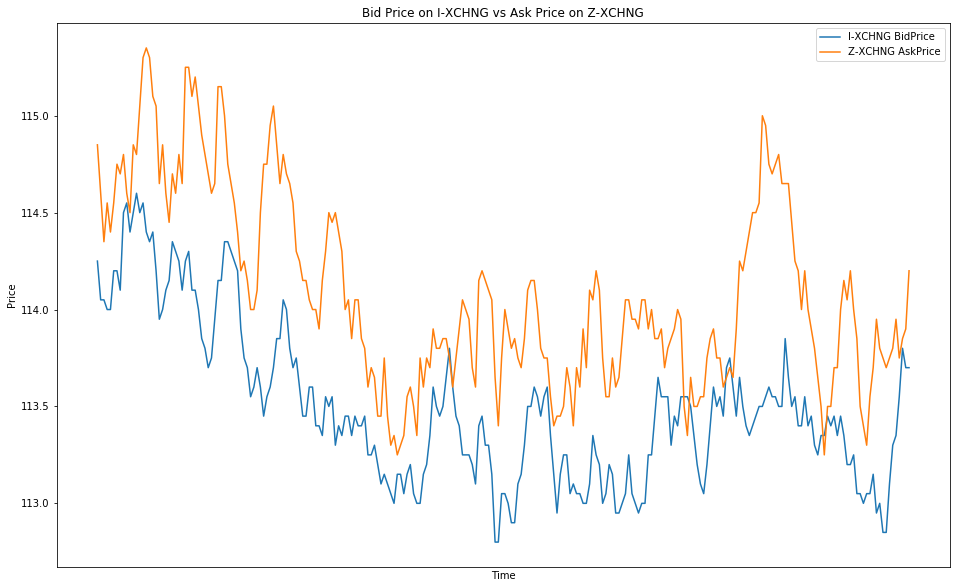

In [16]:
# Select the first 250 rows
market_data_250 = market_data.iloc[:250]

# Set figsize of plot
plt.figure(figsize=(16, 10))

# Create a plot showing the bid and ask prices on different exchanges
def Plot_Bid_Ask(stock1 = 'I-XCHNG', stock2 = 'Z-XCHNG'):
    plt.plot(market_data_250.index, market_data_250[stock1, 'BidPrice'])
    plt.plot(market_data_250.index, market_data_250[stock2, 'AskPrice'])
    plt.xticks([])
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Bid Price on '  + stock1 + ' vs Ask Price on ' + stock2)
    plt.legend([stock1 + ' BidPrice', stock2 + ' AskPrice'])
    plt.show()


# Note arbitrage possible in case the BidPrice is higher than the AskPrice.
Plot_Bid_Ask()

This code is a function that plots the bid price of two stocks, 'I-XCHNG' and 'Z-XCHNG', against each other. It first takes 250 rows of market data and stores it in a variable called 'market_data_250'. Then, it creates a figure with a specific size of 16 by 10. Next, the function named 'Plot_Bid_Ask' is defined and within this function, it plots the bid price of stock1 and the ask price of stock2 over the 250 rows of market data. The x-axis is set to display only the indices, which are the date and time of the market data. The labels for the x and y axes are also set as 'Time' and 'Price' respectively. Additionally, a title is given to the plot, displaying the names of the two stocks being compared. Finally, a legend is added to indicate which line represents which stock and the plot is displayed. Overall, this code helps someone visualize and compare the bid price of one stock and the ask price of another stock.

In [17]:
# Add columns to DataFrame
market_data['I-Bid-Z-Ask-Spread'] = market_data['I-XCHNG', 'BidPrice'] - market_data['Z-XCHNG', 'AskPrice']
market_data['Z-Bid-I-Ask-Spread'] = market_data['Z-XCHNG', 'BidPrice'] - market_data['I-XCHNG', 'AskPrice']
market_data.head()

I-XCHNG                               Z-XCHNG            \
                    BidPrice BidVolume AskPrice AskVolume BidPrice BidVolume   
2018-01-01 00:05:00   114.25     120.0   114.55     120.0   113.95      40.0   
2018-01-01 00:10:00   114.05     119.0   114.40     102.0   113.65      42.0   
2018-01-01 00:15:00   114.05     119.0   114.40     105.0   113.30      41.0   
2018-01-01 00:20:00   114.00     116.0   114.40     124.0   113.50      40.0   
2018-01-01 00:25:00   114.00     118.0   114.35     133.0   113.45      43.0   

                                       I-Bid-Z-Ask-Spread Z-Bid-I-Ask-Spread  
                    AskPrice AskVolume                                        
2018-01-01 00:05:00   114.85      40.0              -0.60              -0.60  
2018-01-01 00:10:00   114.60      36.0              -0.55              -0.75  
2018-01-01 00:15:00   114.35      35.0              -0.30              -1.10  
2018-01-01 00:20:00   114.55      37.0              -0.55              -0.90  
2018-01-01 00:25:00   114.40      33.0              -0.40              -0.90

This code is manipulating some data related to bids and ask prices in the stock market. It creates two new columns in a table called market_data: "I-Bid-Z-Ask-Spread" and "Z-Bid-I-Ask-Spread". These columns will contain values calculated by subtracting the bid price from one exchange called "I-XCHNG" from the ask price of another exchange called "Z-XCHNG". This is done in order to compare the difference in prices between the two exchanges. The code then displays the first few rows of this updated table.

In [18]:
# Create new DataFrame containing all arbitrage opportunities for comparison
arbitrage = market_data.loc[(market_data['I-Bid-Z-Ask-Spread'] > 0) | (market_data['Z-Bid-I-Ask-Spread'] > 0)]
arbitrage.head()

I-XCHNG                               Z-XCHNG            \
                    BidPrice BidVolume AskPrice AskVolume BidPrice BidVolume   
2018-01-01 04:30:00   113.60     119.0   113.90      98.0   114.05      34.0   
2018-01-01 04:35:00   113.70     108.0   114.00     103.0   114.20      33.0   
2018-01-01 09:05:00   113.80      88.0   114.10      88.0   112.90      24.0   
2018-01-01 15:05:00   113.55     130.0   113.85     112.0   112.70      37.0   
2018-01-01 15:10:00   113.55     129.0   113.85     113.0   112.55      38.0   

                                       I-Bid-Z-Ask-Spread Z-Bid-I-Ask-Spread  
                    AskPrice AskVolume                                        
2018-01-01 04:30:00   114.95      39.0              -1.35               0.15  
2018-01-01 04:35:00   115.05      35.0              -1.35               0.20  
2018-01-01 09:05:00   113.75      31.0               0.05              -1.20  
2018-01-01 15:05:00   113.50      39.0               0.05              -1.15  
2018-01-01 15:10:00   113.35      39.0               0.20              -1.30

This code selects certain data from a larger dataset and puts it into a new smaller dataset. The new dataset only includes information about specific financial transactions called "arbitrages", where the difference between prices for buying and selling a certain type of asset in different markets is greater than 0. It then takes the first few rows of this new dataset and displays them.

In [19]:
# Design arbitrage strategy that gives all positions

positions = {'Timestamp': [],
             'Position-I-XCHNG': [],
             'Position-Z-XCHNG': []}

current_position = 0

for time, mkt_data_at_time in market_data.iterrows():

    if mkt_data_at_time['I-Bid-Z-Ask-Spread', ''] > 0:
        buy = min(mkt_data_at_time['I-XCHNG', 'BidVolume'],
                  mkt_data_at_time['Z-XCHNG', 'AskVolume'], (250 - current_position))
        spread = mkt_data_at_time['I-Bid-Z-Ask-Spread']
        positions['Timestamp'].append(time)
        positions['Position-I-XCHNG'].append(- buy - current_position)
        positions['Position-Z-XCHNG'].append(+ buy + current_position)
        current_position = buy

    elif mkt_data_at_time['Z-Bid-I-Ask-Spread', ''] > 0:
        buy = min(mkt_data_at_time['Z-XCHNG', 'BidVolume'],
                  mkt_data_at_time['I-XCHNG', 'AskVolume'], (250 - current_position))
        spread = mkt_data_at_time['Z-Bid-I-Ask-Spread']
        positions['Timestamp'].append(time)
        positions['Position-I-XCHNG'].append(+ buy + current_position)
        positions['Position-Z-XCHNG'].append(- buy - current_position)
        current_position = buy

positions = pd.DataFrame(positions).set_index('Timestamp')

positions.head()

Position-I-XCHNG  Position-Z-XCHNG
Timestamp                                              
2018-01-01 04:30:00              34.0             -34.0
2018-01-01 04:35:00              67.0             -67.0
2018-01-01 09:05:00             -64.0              64.0
2018-01-01 15:05:00             -70.0              70.0
2018-01-01 15:10:00             -78.0              78.0

This code is used to track the positions of two trading platforms, labeled 'I-XCHNG' and 'Z-XCHNG'. The code creates an empty list to store the timestamps, and two empty lists to store the positions of each trading platform.   The code then goes through a set of market data, looking at the spread (the difference between the buying and selling prices) for a specific trading pair. If the spread for the pair labeled 'I-Bid-Z-Ask-Spread' is greater than 0, it will check to see if there is enough available volume (the quantity of an asset that can be bought or sold) to buy or sell at those prices. It will then update the current position (or number of assets currently owned) by subtracting the bought amount from the current position if buying or adding the bought amount if selling.   On the other hand, if the spread for the pair labeled 'Z-Bid-I-Ask-Spread' is greater than 0, it will do the same as before, but with the trading pair in reverse order.   The code then adds the timestamp and updated positions to the list, and repeats this process until there is no more market data to analyze. Finally, the code arranges the list into a table, with the timestamps as the rows and the position updates as the columns. This table shows the changes in positions for the two trading platforms over time.